In [7]:
from matplotlib import pyplot as plt
import numpy
plt.rcParams['figure.figsize'] = (10, 5)

def parse_moco_logfile(cur_file):
    with open(cur_file) as f_obj:
        lines = f_obj.readlines()

    epoch_list = []
    loss_list = []
    acc_1_list = []
    acc_5_list = []

    for line in lines:

        if line.startswith("Epoch: [" ):

            while "( " in line:
                line = line.replace("( ","(")

            while "[ " in line:
                line = line.replace("[ ","[")


            sline = line.split()
            #for i,t in enumerate(sline):
            #    print(i,t)

            e = int(sline[1][1:-1].split("][")[0])
            l = float(sline[9])
            acc_1 = float(sline[12])
            acc_5 = float(sline[15])

            #if len(loss_list) %1000 == 0:
            #    print(line, l)
            epoch_list.append(e)
            loss_list.append(l)
            acc_1_list.append(acc_1)
            acc_5_list.append(acc_5)
            
    return dict(epoch=epoch_list, loss=loss_list, acc1 = acc_1_list, acc5 = acc_5_list)

In [8]:
import numpy as np
def smooth_func(y, box_pts=200):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='valid')
    return y_smooth

def plot_tr(data, smooth=False):
    #plt.plot(loss_list)
    fig, ax = plt.subplots(1,)
    
    ax2 = ax.twinx()
    if smooth:
        data1 = smooth_func(data["acc1"])
        data2 = smooth_func(data["loss"])
    else:
        data1 = data["acc1"]
        data2 = data["loss"]
    
    ax.plot(data1, 'b')
    ax2.plot(data2,'r')
    ax.set_ylabel("accuracy %")
    ax2.set_ylabel("loss")
    ax.grid(True)
    ax2.grid(False)

    #ax2.plot(epoch_list,"r")

    plt.show()

In [9]:
import glob
files = sorted(glob.glob("*.o*"))
print(files)    

['moco_1c_v1.o2408806', 'moco_1c_v2.o2408807', 'moco_3c_v2_bestAug.o2409148', 'moco_3c_v2_bestAug_2_128.o2409446', 'moco_3c_v2_bestAug_2_15.o2409445', 'moco_3c_v2_bestAug_no_ED.o2409147']


moco_3c_v2_bestAug_2_15.o2409445


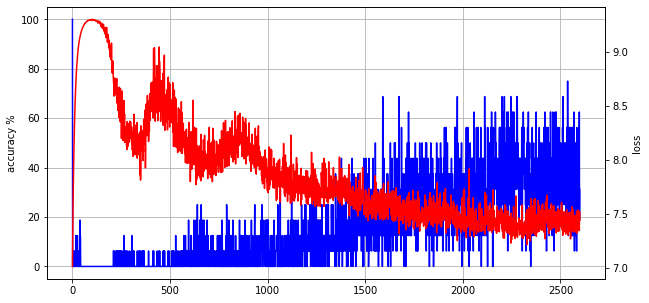

moco_3c_v2_bestAug_2_128.o2409446


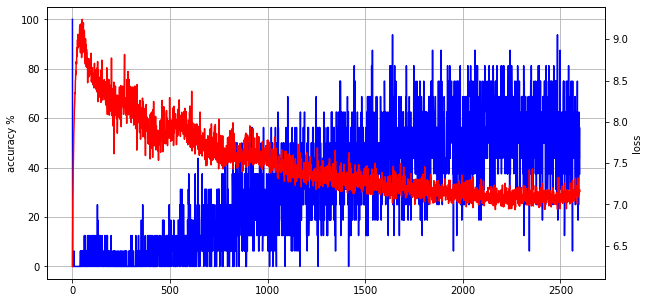

moco_1c_v1.o2408806


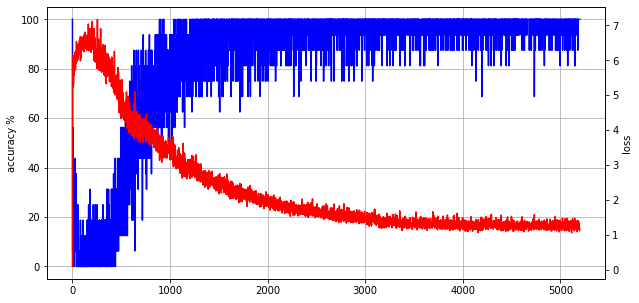

moco_1c_v2.o2408807


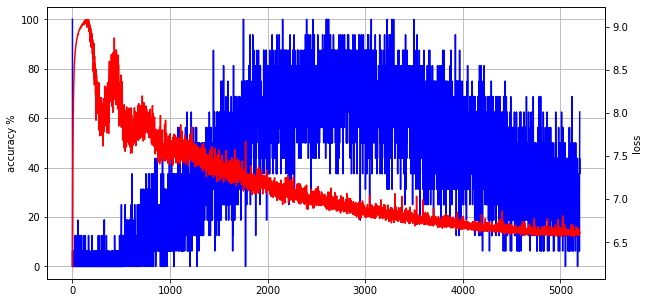

In [11]:
files = [ 
    'moco_3c_v2_bestAug_2_15.o2409445',
    'moco_3c_v2_bestAug_2_128.o2409446',
    'moco_1c_v1.o2408806',
    'moco_1c_v2.o2408807',
]

smooth = False

for cur_fn in files:
    # group different logfiles together
    if isinstance(cur_fn, (list, tuple)):
        data = parse_moco_logfile(cur_fn[0])
        print(cur_fn[0])
        for c_fn in cur_fn[1:]:
            data_extra = parse_moco_logfile(c_fn)
            for k, v in data_extra.items():
                data[k].extend(v)
    else:
        print(cur_fn)
        data = parse_moco_logfile(cur_fn)
        
    plot_tr(data, smooth=smooth)

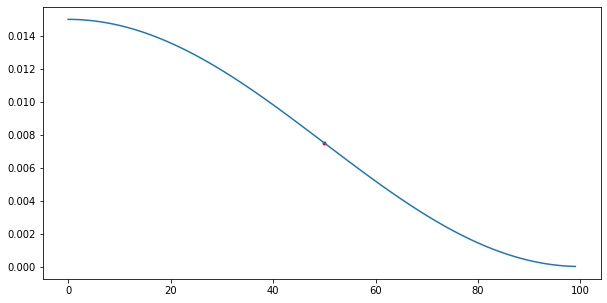

In [5]:
import math
epochs = 100
lr = .015
lrs = []
for epoch in range(epochs):
    e_lr = lr * 0.5 * (1. + math.cos(math.pi * epoch / epochs))
    lrs.append(e_lr)
    
plt.plot(epochs/2,lr/2,'r.')
    
plt.plot(lrs)
plt.show()